<a href="https://colab.research.google.com/github/AbdKhuffash/Udacity_P1_DataCleaning-for-Medical-Appointment-No-Shows-dataset/blob/main/Udacity_P1_DataCleaning_for_Medical_Appointment_No_Shows_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project: Medical Appointment No Shows Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction



### **Dataset Description**


In this project, we are going to analyze the Medical Appointment No-Shows dataset and uncover insights related to patient attendance patterns. We will use Python's data analysis tools, including NumPy, pandas, and Matplotlib, to explore this dataset efficiently. This dataset contains information about over 100,000 medical appointments, detailing patient demographics, appointment scheduling, and attendance status.

1. PatientId: Unique identifier for each patient.
2. AppointmentID: Unique identifier for each medical appointment.
3. Gender: The gender of the patient.
4. ScheduledDay: The date and time when the appointment was scheduled.
5. AppointmentDay: The date of the actual medical appointment.
6. Age: The age of the patient.
7. Neighbourhood: The location of the health facility.
8. Scholarship: Whether the patient is enrolled in the welfare program.
9. Hypertension: Indicates if the patient has hypertension.
10. Diabetes: Indicates if the patient has diabetes.
11. Alcoholism: Indicates if the patient has a history of alcoholism.
12. Handicap: Indicates if the patient has any disabilities.
13. SMS_received: Indicates whether the patient received an SMS reminder for the appointment.
14. No-show: The target column, indicating whether the patient showed up for the appointment.

### **Question(s) for Analysis**

1. What are the demographic patterns (age, gender) of patients who miss their appointments?
2. How does the appointment scheduling time gap (time between scheduling and appointment) affect attendance?
3. Which neighborhoods have the highest rates of no-shows?
4. How does the presence of chronic conditions like hypertension or diabetes correlate with attendance?
5. Does receiving an SMS reminder significantly affect the likelihood of showing up?


Importing Required Libraries


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The libraries that were imported are:

* Pandas: For data manipulation and analysis.

* NumPy: For numerical operations, useful in handling arrays and NaN values.

* Matplotlib: For creating basic visualizations like bar charts, histograms, etc.

* Seaborn: For more advanced and aesthetically pleasing statistical plots.

<a id='wrangling'></a>
# Data Wrangling


### Loading the Data

In [44]:
path = '/content/drive/MyDrive/Colab Notebooks/Udacity/KaggleV2-May-2016.csv'
dataset = pd.read_csv(path)

### Exploring the Data

Analaysing the dataset, knowing more information about it.

This will be done using .head(), .info(), .tail(), .nunique() and .describe() methods.

Head() method will display the fisrt 5 rows of the dataset:



In [31]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


tail() method will display the last 5 rows of the dataset:

In [32]:
dataset.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Info() method will display the summary of the dataframe including the data types of each column, the number of non-null values, and the memory usage.

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



Describe() method provides descriptive statistics for numerical columns in the DataFrame. It calculates various summary statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column.

In [34]:
dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


.nunique() methond counts the number of unique values in each clomumn.

In [35]:
dataset.nunique()

,0
PatientId,62299
AppointmentID,110527
Gender,2
ScheduledDay,103549
AppointmentDay,27
Age,104
Neighbourhood,81
Scholarship,2
Hipertension,2
Diabetes,2



### **Data Cleaning**




#### **Documenting Missing Values**

By using isnull() and sum(), we can identify which columns have missing values and the total number of missing entries.

In [36]:
dataset.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


#### **Documenting Missing Values**

By using duplicated and sum(), we can identify the number of duplicated rows.

In [37]:
dataset.duplicated().sum()

0

Based on the output above there is no Null Values nor duplicates in the dataset.

<a id='eda'></a>
# **Exploratory Data Analysis**











###  Descriptive Statistics

We’ll calculate descriptive statistics, including the mean, median, and standard deviation for the relevant numeric columns in the dataset.

In [38]:
age_mean = dataset['Age'].mean()
age_median = dataset['Age'].median()
age_std = dataset['Age'].std()

dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset['Time_Gap'] = (dataset['AppointmentDay'] - dataset['ScheduledDay']).dt.days

time_gap_mean = dataset['Time_Gap'].mean()
time_gap_median = dataset['Time_Gap'].median()
time_gap_std = dataset['Time_Gap'].std()

total_appointments = len(dataset)
no_show_count = dataset[dataset['No-show'] == 'Yes'].shape[0]
no_show_rate = (no_show_count / total_appointments) * 100

print("Descriptive Statistics for Age:")
print(f"Mean Age: {age_mean:.2f}")
print(f"Median Age: {age_median}")
print(f"Standard Deviation of Age: {age_std:.2f}")

print("\nDescriptive Statistics for Time Gap:")
print(f"Mean Time Gap: {time_gap_mean:.2f} days")
print(f"Median Time Gap: {time_gap_median} days")
print(f"Standard Deviation of Time Gap: {time_gap_std:.2f} days")


print(f"No-Show Rate: {no_show_rate:.2f}%")

Descriptive Statistics for Age:
Mean Age: 37.09
Median Age: 37.0
Standard Deviation of Age: 23.11

Descriptive Statistics for Time Gap:
Mean Time Gap: 9.18 days
Median Time Gap: 3.0 days
Standard Deviation of Time Gap: 15.25 days

No-Show Rate:
No-Show Rate: 20.19%


Based on the results above:
* Mean Age: 37.09: The mean (average) age of the patients in your dataset is approximately 37.09 years. This value is calculated by adding all the ages together and dividing by the number of patients.

* Median Age: 37.0: The median age is 37.0 years, meaning that half of the patients are younger than 37 and half are older. The median is useful because it is not affected by extreme values (outliers) in the dataset, giving a better representation of the central tendency for skewed distributions.

* Standard Deviation of Age: 23.11: The standard deviation indicates how much the ages vary from the mean age. A standard deviation of 23.11 suggests there is a wide spread in ages among the patients, which means some patients are significantly younger or older than the average age of 37.09 years.

---

* Mean Time Gap: 9.18 days: The average time gap between scheduling an appointment and the actual appointment date is approximately 9.18 days. This average gives an idea of how far in advance patients typically schedule their appointments.

* Median Time Gap: 3.0 days: The median time gap of 3.0 days means that half of the appointments are scheduled within 3 days or less of the appointment date, while the other half are scheduled further in advance. This suggests that many patients may be scheduling their appointments very close to the date.

* Standard Deviation of Time Gap: 15.25 days: The standard deviation of 15.25 days indicates a significant variation in the time gap. While many patients may schedule appointments close to the appointment date, there are also some patients who schedule much further in advance, leading to this larger variability.

---

* No-Show Rate: 20.19%: This percentage indicates that approximately 20.19% of the patients did not attend their scheduled appointments. This metric is important for healthcare providers to understand appointment adherence and to assess the potential impact on healthcare delivery, resource allocation, and overall patient care.


## Questions

### Q1: What are the demographic patterns (age, gender) of patients who miss their appointments?

To understand the age distribution of patients who missed their appointments, we will create a histogram showing the age distribution of patients who did and did not show up for their appointments.

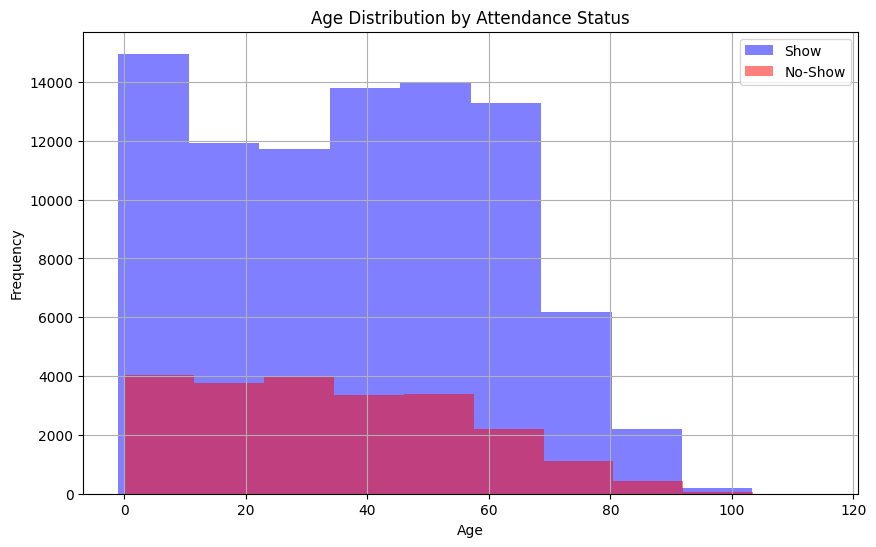

In [45]:
plt.figure(figsize=(10, 6))
dataset[dataset['No-show'] == 'No']['Age'].hist(alpha=0.5, color='blue', label='Show')
dataset[dataset['No-show'] == 'Yes']['Age'].hist(alpha=0.5, color='red', label='No-Show')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Attendance Status')
plt.show()

To analyze the gender distribution of no-show patients, we will Create a count plot showing the number of male and female patients who missed their appointments.

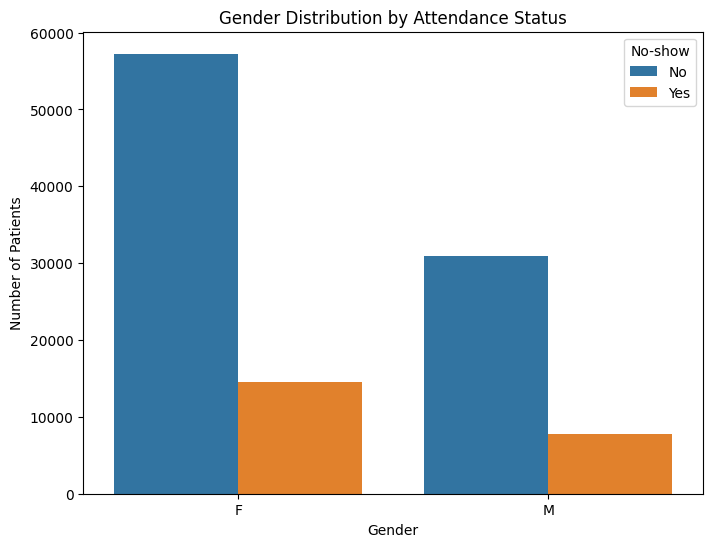

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='No-show', data=dataset)
plt.title('Gender Distribution by Attendance Status')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

To investigate the relationship between age, gender, and no-show rates, we will use a boxplot to visualize how age and gender together impact the likelihood of missing an appointment.

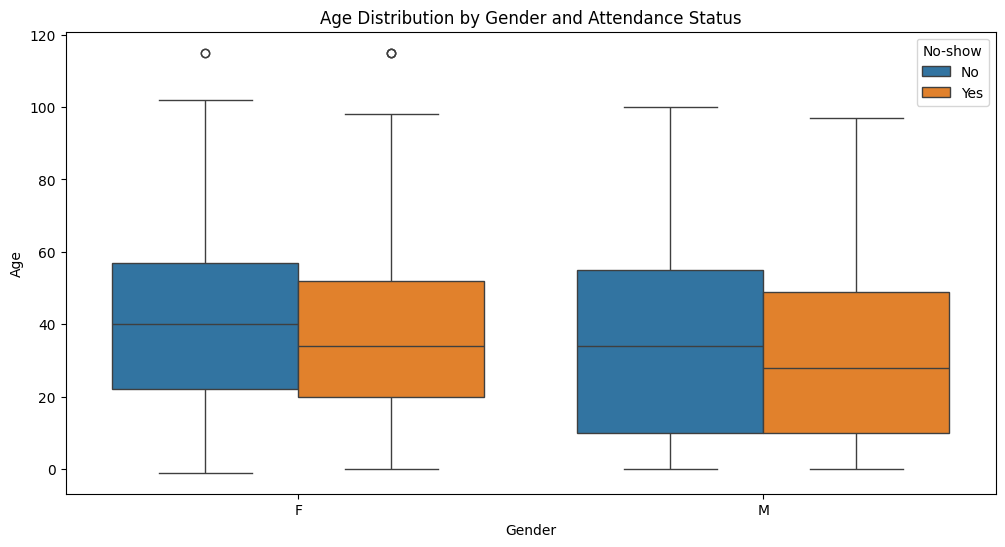

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Age', hue='No-show', data=dataset, dodge=True)
plt.title('Age Distribution by Gender and Attendance Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

To explore how different age groups and genders affect no-show rates, we create age groups and summarize the no-show rates for each group, then visualize it using a bar plot.

<ipython-input-52-743ee38a659b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_counts = dataset.groupby(['Age_Group', 'Gender', 'No-show']).size().unstack(fill_value=0)


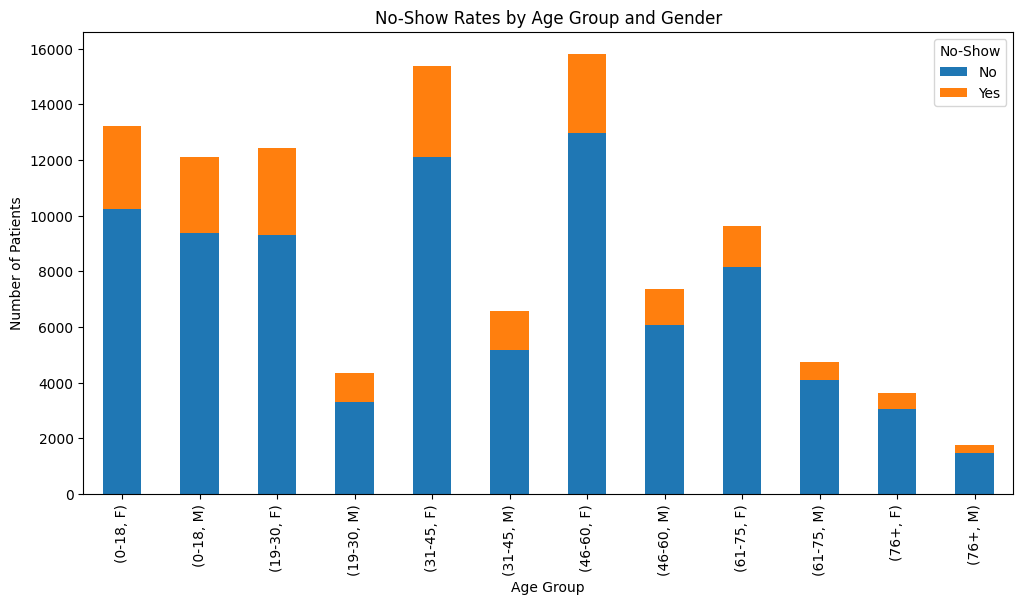

In [52]:
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

no_show_counts = dataset.groupby(['Age_Group', 'Gender', 'No-show']).size().unstack(fill_value=0)
no_show_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('No-Show Rates by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='No-Show', loc='upper right')
plt.show()

**Summary:**
* Age Patterns: The analysis shows that no-show rates are most prominent among patients in the 19-30 age group, but younger patients (ages 0-18) also display a relatively high number of no-shows. Older age groups, particularly those aged 76 and above, have significantly lower no-show rates.
* Gender Differences: Females are more likely to miss appointments than males, showing a significant discrepancy in attendance rates.
* Combined Insights: When examining age and gender together, (46-60) females exhibit the highest no-show rates.

### Q2: How does the appointment scheduling time gap (time between scheduling and appointment) affect attendance?

Time Gap Analysis

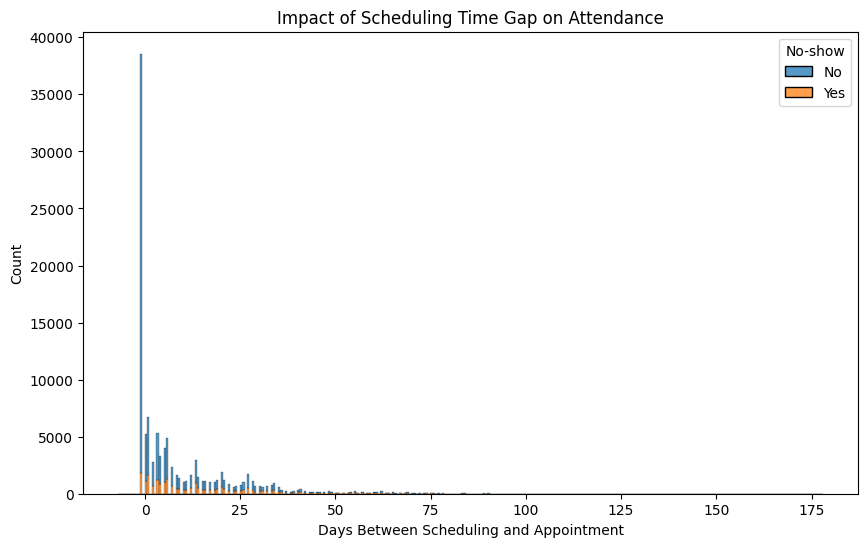

In [56]:
dataset['Time_Gap'] = (pd.to_datetime(dataset['AppointmentDay']) - pd.to_datetime(dataset['ScheduledDay'])).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Time_Gap', hue='No-show', multiple='stack')
plt.xlabel('Days Between Scheduling and Appointment')
plt.title('Impact of Scheduling Time Gap on Attendance')
plt.show()

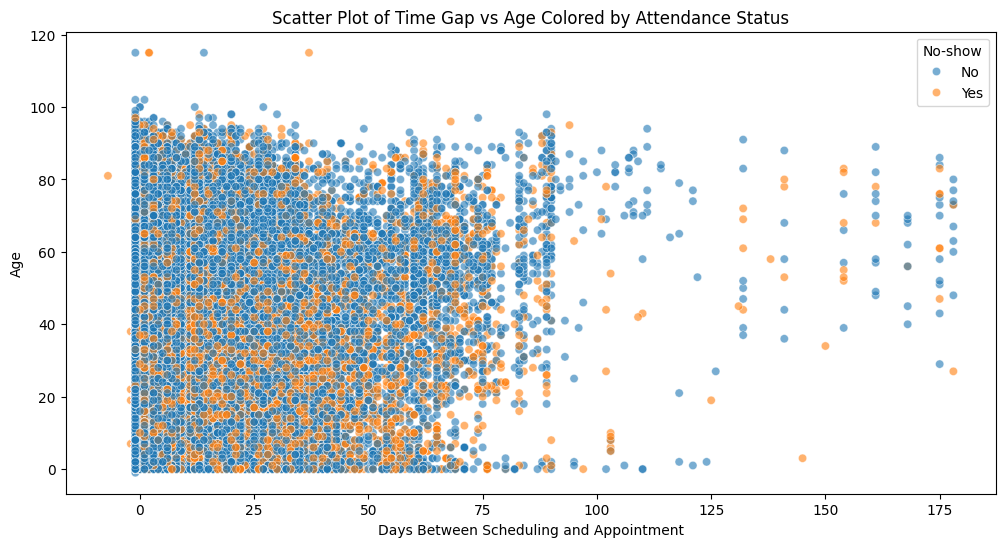

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time_Gap', y='Age', hue='No-show', data=dataset, alpha=0.6)
plt.title('Scatter Plot of Time Gap vs Age Colored by Attendance Status')
plt.xlabel('Days Between Scheduling and Appointment')
plt.ylabel('Age')
plt.legend(title='No-show', loc='upper right')
plt.show()

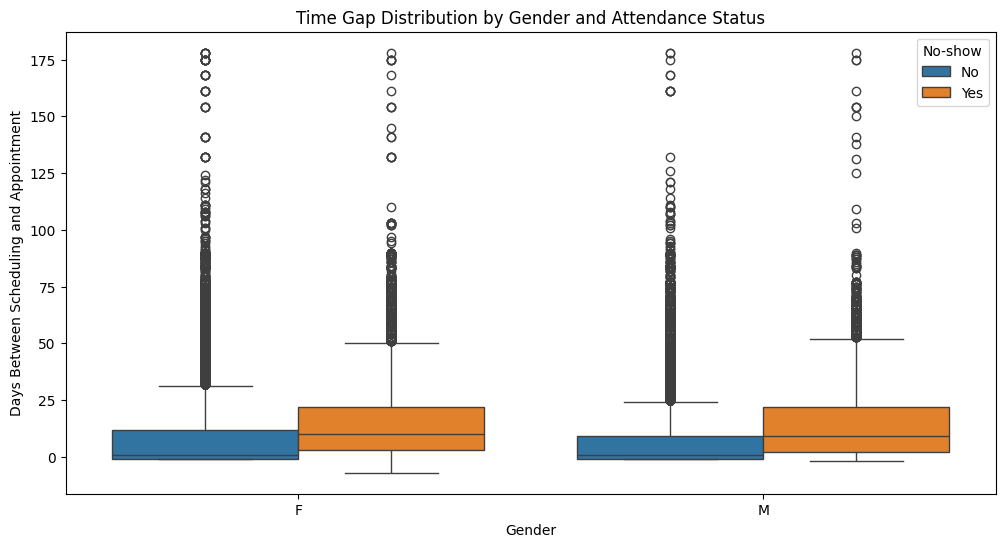

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Time_Gap', hue='No-show', data=dataset, dodge=True)
plt.title('Time Gap Distribution by Gender and Attendance Status')
plt.xlabel('Gender')
plt.ylabel('Days Between Scheduling and Appointment')
plt.show()

**Sammury**:
* Increasing Time Gap, Increasing No-Shows: As the time gap between scheduling and the appointment increases, the proportion of no-shows tends to rise. This trend is consistent across different genders and age groups.

* Gender Differences: While both genders exhibit similar trends, females appear to have a slightly higher proportion of no-shows, particularly for longer time gaps.

* Age Differences: Younger individuals (below 50 years old) appear to have a higher likelihood of attending regardless of the time gap, whereas older individuals (above 50 years old) show a more significant impact of the time gap on attendance.



### Q3: Which neighborhoods have the highest rates of no-shows?

To find the neighborhoods with the highest no-show rates, we will calculate the no-show rates per neighborhood.

In [61]:
no_show_rates = dataset.groupby('Neighbourhood')['No-show'].value_counts(normalize=True).unstack()
no_show_rates = no_show_rates['Yes']

no_show_rates = no_show_rates.sort_values(ascending=False).reset_index()
no_show_rates.columns = ['Neighbourhood', 'No-Show Rate']


no_show_rates.head(10)

,Neighbourhood,No-Show Rate
0,ILHAS OCEÂNICAS DE TRINDADE,1.000000
1,SANTOS DUMONT,0.289185
2,SANTA CECÍLIA,0.274554
3,SANTA CLARA,0.264822
4,ITARARÉ,0.262664
5,JESUS DE NAZARETH,0.243954
6,HORTO,0.240000
7,ILHA DO PRÍNCIPE,0.234775
8,CARATOÍRA,0.230409
9,ANDORINHAS,0.230327


Bar Plot of No-Show Rates by Neighborhood

<ipython-input-60-61b71b0a6a63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No-Show Rate', y='Neighbourhood', data=no_show_rates.head(10), palette='viridis')


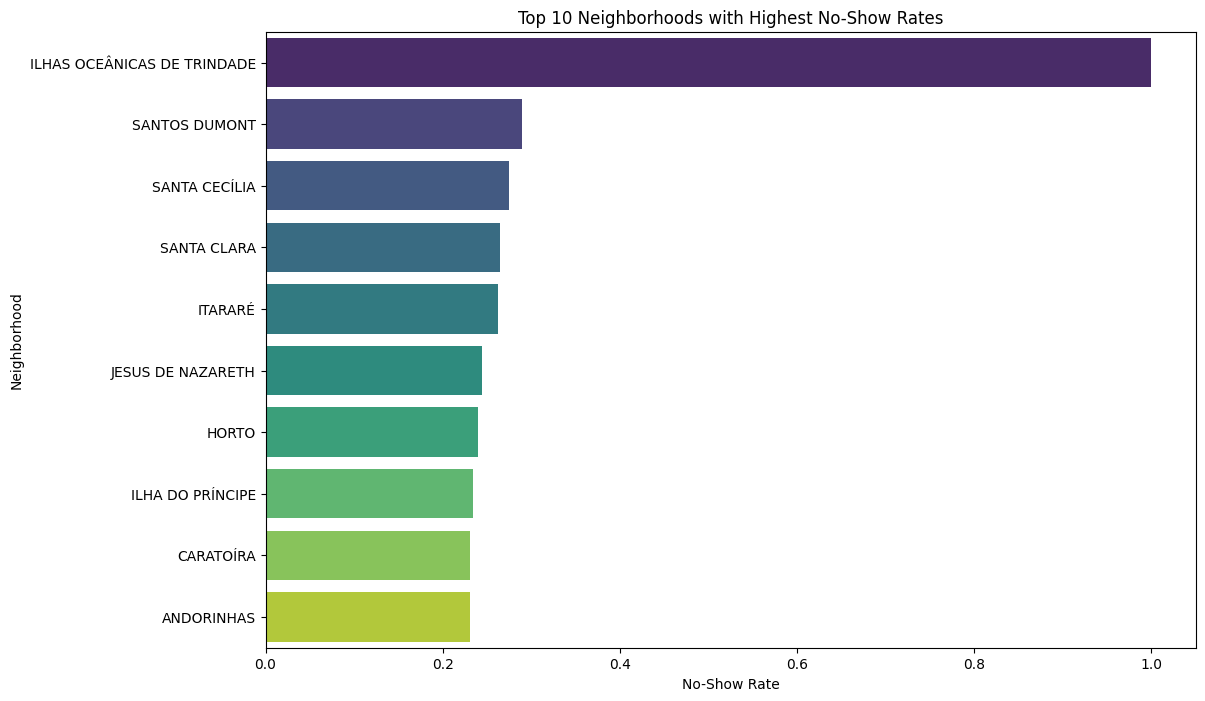

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(x='No-Show Rate', y='Neighbourhood', data=no_show_rates.head(10), palette='viridis')
plt.title('Top 10 Neighborhoods with Highest No-Show Rates')
plt.xlabel('No-Show Rate')
plt.ylabel('Neighborhood')
plt.show()

To see if age groups within neighborhoods show differing no-show rates, we will use barplots.

<ipython-input-64-05477689ae3b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_no_show = dataset.groupby(['Neighbourhood', 'Age Group'])['No-show'].value_counts(normalize=True).unstack().fillna(0)


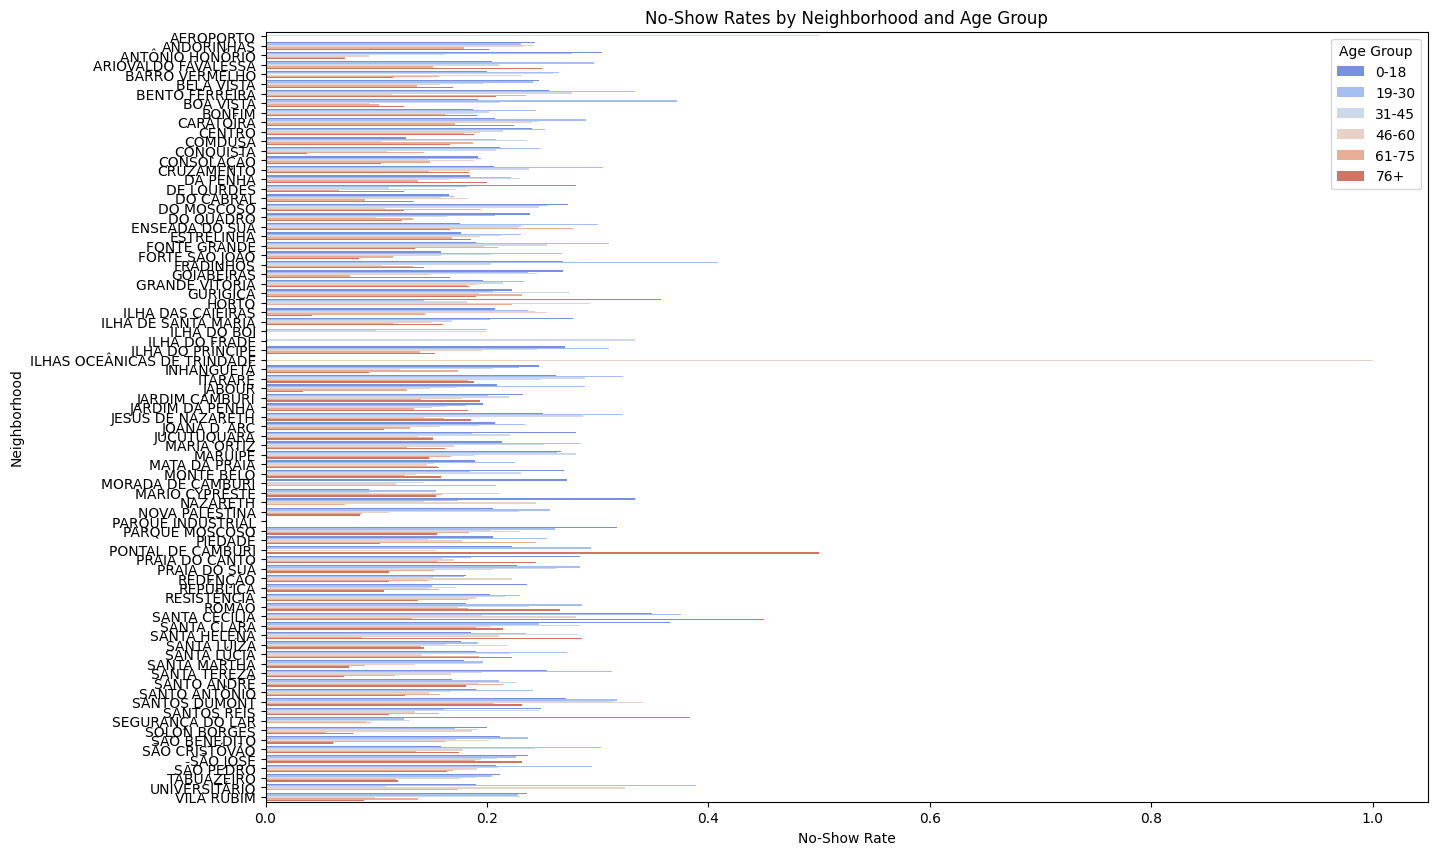

In [64]:
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

# Group by Neighborhood and Age Group
age_no_show = dataset.groupby(['Neighbourhood', 'Age Group'])['No-show'].value_counts(normalize=True).unstack().fillna(0)
age_no_show['No-Show Rate'] = age_no_show['Yes']

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(data=age_no_show.reset_index(), x='No-Show Rate', y='Neighbourhood', hue='Age Group', palette='coolwarm')
plt.title('No-Show Rates by Neighborhood and Age Group')
plt.xlabel('No-Show Rate')
plt.ylabel('Neighborhood')
plt.show()

To see if gender within neighborhoods show differing no-show rates, we will use barplots.

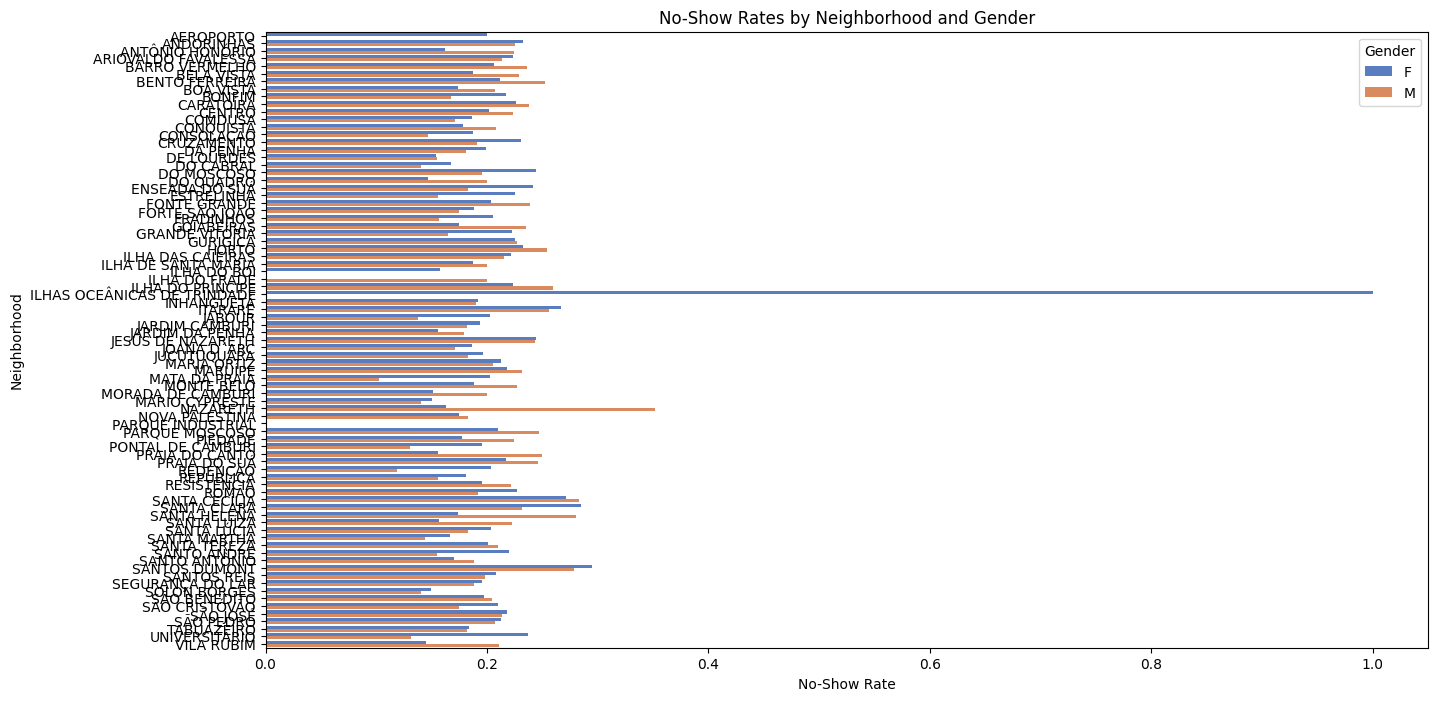

In [63]:
gender_no_show = dataset.groupby(['Neighbourhood', 'Gender'])['No-show'].value_counts(normalize=True).unstack().fillna(0)
gender_no_show['No-Show Rate'] = gender_no_show['Yes']

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=gender_no_show.reset_index(), x='No-Show Rate', y='Neighbourhood', hue='Gender', palette='muted')
plt.title('No-Show Rates by Neighborhood and Gender')
plt.xlabel('No-Show Rate')
plt.ylabel('Neighborhood')
plt.show()

**Sammury**:
* Ilhas Oceânicas de Trindade has the highest no-show rates.
* Generally, females tend to have slightly higher no-show rates than males across most neighborhoods. However, this difference is not significant in all cases.


### Q4: Does receiving an SMS reminder significantly affect the likelihood of showing up?

To assess how SMS reminders affect no-show rates, we will  calculate the no-show rates for patients who received SMS reminders versus those who did not.

In [66]:
sms_no_show_rates = dataset.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack()
sms_no_show_rates = sms_no_show_rates['Yes']

sms_no_show_rates = sms_no_show_rates.reset_index()
sms_no_show_rates.columns = ['SMS Received', 'No-Show Rate']

sms_no_show_rates

,SMS Received,No-Show Rate
0,0,0.167033
1,1,0.275745


Bar Plot of No-Show Rates Based on SMS Reminders

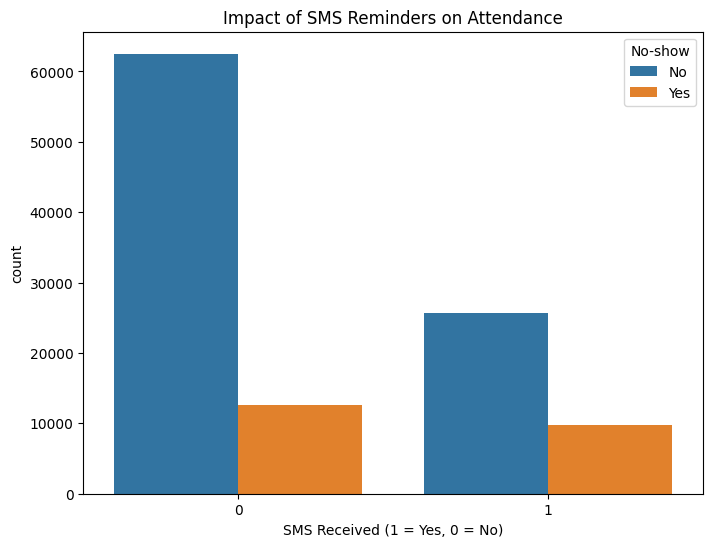

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SMS_received', hue='No-show', data=dataset)
plt.title('Impact of SMS Reminders on Attendance')
plt.xlabel('SMS Received (1 = Yes, 0 = No)')
plt.show()

To see if gender influences the effectiveness of SMS reminders:

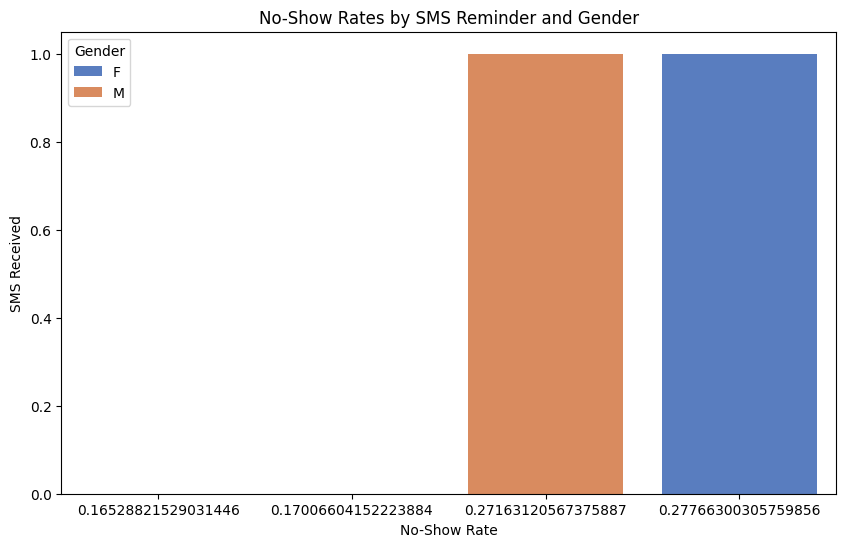

In [67]:
sms_gender_no_show = dataset.groupby(['SMS_received', 'Gender'])['No-show'].value_counts(normalize=True).unstack().fillna(0)
sms_gender_no_show['No-Show Rate'] = sms_gender_no_show['Yes']

plt.figure(figsize=(10, 6))
sns.barplot(data=sms_gender_no_show.reset_index(), x='No-Show Rate', y='SMS_received', hue='Gender', palette='muted')
plt.title('No-Show Rates by SMS Reminder and Gender')
plt.xlabel('No-Show Rate')
plt.ylabel('SMS Received')
plt.show()


**Sammury**:
* Patients who did not receive an SMS reminder had a no-show rate of approximately 16.7%. In contrast, those who received an SMS reminder had a significantly higher no-show rate of about 27.6%.
* SMS reminders might not be as effective in reducing no-show rates for females compared to males.


### Q5: How does the presence of chronic conditions like hypertension or diabetes correlate with attendance?

In [71]:
hypertension_no_show_rate = dataset[dataset['Hipertension'] == 1]['No-show'].value_counts(normalize=True).get('Yes', 0)

diabetes_no_show_rate = dataset[dataset['Diabetes'] == 1]['No-show'].value_counts(normalize=True).get('Yes', 0)

no_chronic_no_show_rate = dataset[(dataset['Hipertension'] == 0) & (dataset['Diabetes'] == 0)]['No-show'].value_counts(normalize=True).get('Yes', 0)

no_show_rates = {
    'Hypertension': hypertension_no_show_rate,
    'Diabetes': diabetes_no_show_rate,
    'No Chronic Conditions': no_chronic_no_show_rate
}

no_show_rates_df = pd.DataFrame(no_show_rates.values(), index=no_show_rates.keys(), columns=['No-Show Rate'])
no_show_rates_df


,No-Show Rate
Hypertension,0.173020
Diabetes,0.180033
No Chronic Conditions,0.209215


Bar Chart plot to see the No-show Rates by Chronic Conditions

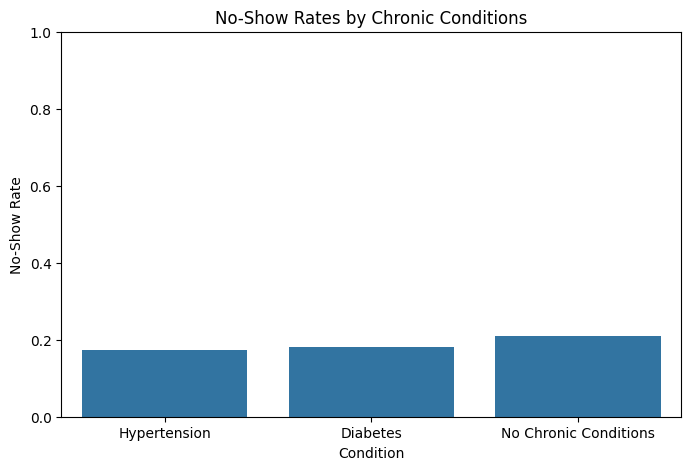

In [72]:
plt.figure(figsize=(8, 5))
sns.barplot(x=no_show_rates_df.index, y='No-Show Rate', data=no_show_rates_df)
plt.title('No-Show Rates by Chronic Conditions')
plt.ylabel('No-Show Rate')
plt.xlabel('Condition')
plt.ylim(0, 1)
plt.show()

We'll analyze how the combination of chronic conditions (hypertension and diabetes), age demographics, and whether patients received SMS reminders affect attendance rates.

<ipython-input-76-603551b06bc1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataset.groupby(['Hipertension', 'Diabetes', 'SMS_received', 'Age Group'])['No-show'].value_counts(normalize=True).unstack()
<ipython-input-76-603551b06bc1>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data, x='No-Show Rate', y='Age Group', hue='SMS_received', palette='viridis', ci=None)


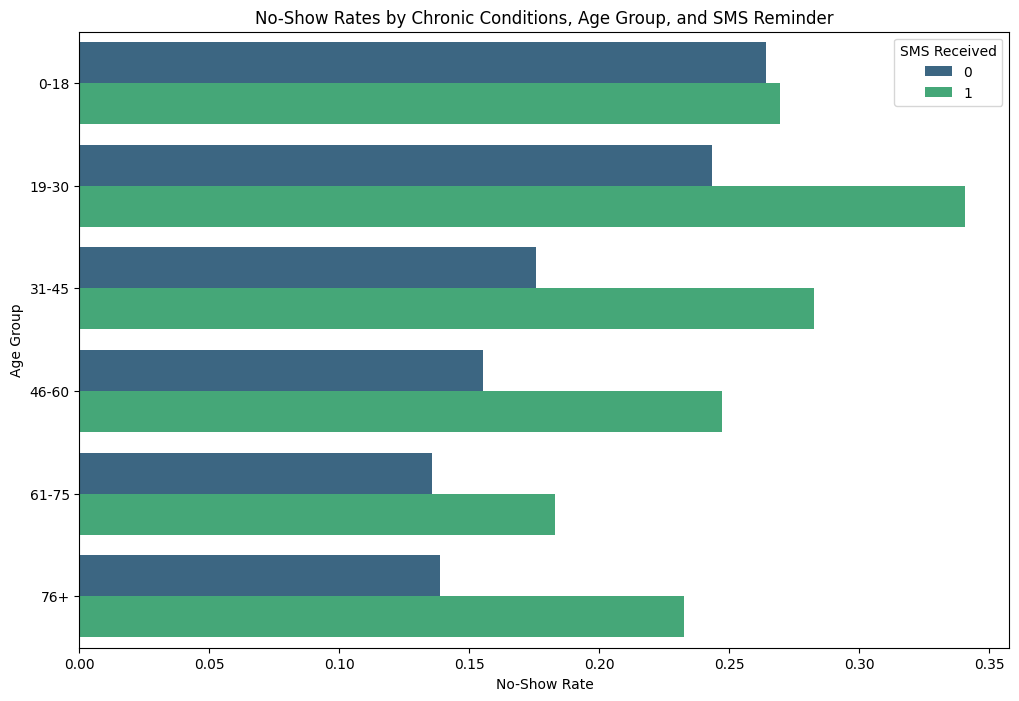

In [76]:
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

grouped_data = dataset.groupby(['Hipertension', 'Diabetes', 'SMS_received', 'Age Group'])['No-show'].value_counts(normalize=True).unstack()
grouped_data['No-Show Rate'] = grouped_data['Yes']

grouped_data = grouped_data.reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='No-Show Rate', y='Age Group', hue='SMS_received', palette='viridis', ci=None)
plt.title('No-Show Rates by Chronic Conditions, Age Group, and SMS Reminder')
plt.xlabel('No-Show Rate')
plt.ylabel('Age Group')
plt.legend(title='SMS Received', loc='upper right')
plt.show()


**Sammury**:
* Patients diagnosed with hypertension exhibited a no-show rate of approximately 17.3%, while those with diabetes had a slightly higher no-show rate of about 18.0%. In contrast, patients without any chronic conditions had the highest no-show rate at approximately 20.9%.

* The presence of chronic conditions (hypertension and diabetes) seems to slightly decrease no-show rates, especially in older age groups.

<a id='conclusions'></a>
# **Conclusion**
   

Based on the analysis conducted, we identified several key findings regarding patient no-shows:

* Demographic Insights: The age group of 19-30 shows a significant prevalence of no-shows, indicating potential barriers that need to be addressed. Females, especially in the 46-60 age range, exhibit the highest no-show rates, suggesting that targeted interventions might be beneficial.
* Time Gap Impact: There is a clear trend showing that longer scheduling time gaps correlate with higher no-show rates. This finding emphasizes the need for timely reminders as the appointment date approaches.
* Neighborhood Variability: Certain neighborhoods experience disproportionately high no-show rates, indicating potential socio-economic factors at play. Understanding these dynamics could lead to more effective outreach and support strategies.

* Patients with chronic conditions, such as hypertension or diabetes, exhibit different attendance patterns compared to those without such conditions.

Future Work:
To Develop machine learning models to predict no-shows based on the available features, which can help healthcare providers proactively address attendance issues.

Limitations: The findings are based on a specific patient population and may not be applicable to other demographics or healthcare settings, limiting broader applicability.